# Прв парцијален испит по Роботика 1

Датум: 14.04.2021

In [2]:
import sympy as sp
import numpy as nu
import math
import script as rt

## Задача 3

**(25 поени)** Дадена е роботската рака од сликата. Да се определи инверзната кинематика на набљудуваниот роботски механизам со помош на геометрискиот приод.

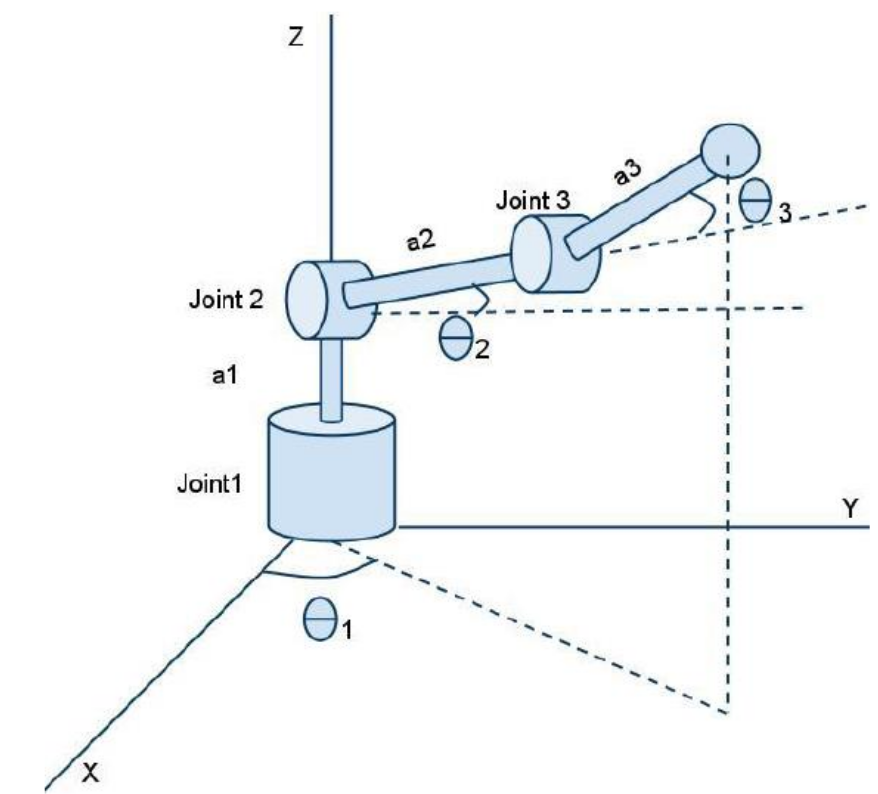

In [1]:
from IPython import display
display.Image('images/1.png', width=600)

## Решение

In [3]:
theta1,theta2,theta3,a1,a2,a3=sp.symbols('theta1,theta2,theta3,a1,a2,a3')
robot=rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,sp.pi/2)
robot.add_revolute_joint(theta2,0,a2,0)
robot.add_revolute_joint(theta3,0,a3,0)
robot.add_subs([(a1,1),(a2,1),(a3,1)])
robot.interact()

In [4]:
A1=robot.get_dh_joint_to_joint(0,1)
A2=robot.get_dh_joint_to_joint(1,2)
A3=robot.get_dh_joint_to_joint(2,3)
T03=A1*A2*A3
T03.simplify()
T03

Matrix([
[cos(theta1)*cos(theta2 + theta3), -sin(theta2 + theta3)*cos(theta1),  sin(theta1), (a2*cos(theta2) + a3*cos(theta2 + theta3))*cos(theta1)],
[sin(theta1)*cos(theta2 + theta3), -sin(theta1)*sin(theta2 + theta3), -cos(theta1), (a2*cos(theta2) + a3*cos(theta2 + theta3))*sin(theta1)],
[            sin(theta2 + theta3),              cos(theta2 + theta3),            0,          a1 + a2*sin(theta2) + a3*sin(theta2 + theta3)],
[                               0,                                 0,            0,                                                      1]])

In [14]:
x,y,z=T03[:3,3].subs([(a2,1),(a1,1),(a3,1)])
theta1=sp.atan(y/x)
theta1

atan(sin(theta1)/cos(theta1))